# 연속형 확률변수

### 연속형 확률변수
- 확률변수가 취할 수 있는 값이 연속적인 확률변수
- 특정 값을 취하는 확률은 정의되지 않음
- 확률변수가 어느 구간에 들어가는 확률을 정의



- [예] 룰렛:

    - 취할 수 있는 값이 0부터 1사이의 실수
    - 큰 수일수록 나오기 쉬워지는 불공정한 구조
    - 0.5라는 값을 취할 확률은 0
    - 정확하게 0.5000000⋯을 취할 가능성은 없으므로 확률은 0


### 확률밀도함수


- 확률변수가 취할 수 있는 값은 구간 [a, b]
- 확률은 확률밀도함수(PDF) 또는 밀도함수 𝑓(𝑥)에 의해 정의


- 어떤 특정 값을 취하는 확률로는 정의되지 않음
    - 𝑓(𝑥) ≠𝑃(𝑋=𝑥) 
    
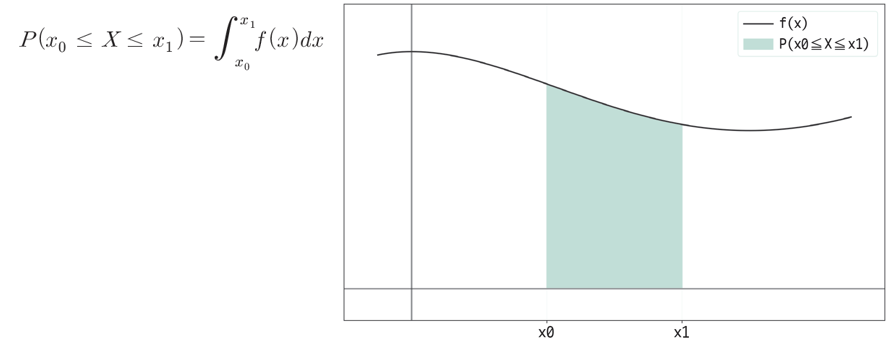
- 이 적분은 밀도함수 f(x)와 x축, 그리고 두 직선 x=x0, x=x1로 둘러싸인 영역의 면적으로 해설할 수 있고 그림에서 칠해진 면적이 확률P임


### 불공정한 룰렛을 예로 들어 코드를 구현

- [예] 룰렛:
    - 취할 수 있는 값이 0부터 1사이의 실수
    - 큰 수일수록 나오기 쉬워지는 불공정한 구조
    - 0.5라는 값을 취할 확률은 0
    - 정확하게 0.5000000⋯을 취할 가능성은 없으므로 확률은 0


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
from scipy import integrate
import warnings

# 적분에 관한 warning을 출력하지 않도록 한다
warnings.filterwarnings('ignore',
                        category=integrate.IntegrationWarning)

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
# 취할 수 있는 값의 구간을 정의
x_range=np.array([0,1])

- x_range를 정의역으로 하는 밀도 함수를 구현 
    - 불공정한 룰렛은 큰 값일수록 나오기 쉽기 때문에 아래와 같은 밀도함수로 정의하기로 하자    

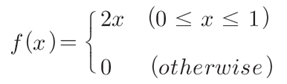

In [5]:
# 불공정한 룰렛의 밀도함수 f 정의
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2*x
    else:
        return 0

In [6]:

# 위 식은 0.4가 나올 확률이 아니다 
# 연속형이므로 두 구간 경계위치값을 옆 수식으로 
# 구해 면적을 그린 후 해당 면적을 적분으로 구하면 해당 값이 두 구간이 나올 확률이 됨

0.800

In [6]:
X=[x_range,f]
# 확률분포 [x_range, f] , 확률변수 X

- 밀도함수 f(x)를 그래프로 그림
    - 확률의 이미지를 쉽게 전달하기위해 f(x)와 x축, 두 직선=0.4, x=0.6의 영역에 색을 적용
    - (불공정한 룰렛이 0.4부터 0.6사이의 값을 취할 확률)

(-0.100, 1.100)

(-0.200, 2.100)

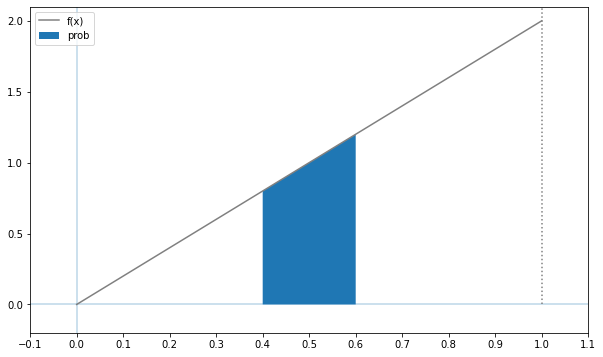

In [11]:
xs = np.linspace(x_range[0], x_range[1], 100)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# 수평선
ax.hlines(0, -0.2, 1.2, alpha=0.3)

# 수직선(좌표 최소 최대에)
# ax.vlines(x, ymin, ymax, alpha=)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# # 직선 그리기
ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')

# # 0.4부터 0.6 까지 x좌표를 준비
xs = np.linspace(0.4, 0.6, 100)
ys = [f(x) for x in xs]

# # 위 두값의 처음과 마지막 데이터를 활용해 사각형의 영역을 칠 함
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

### plt.plt.fill_between()   예시


Text(0.5, 0, 'X-Label')

Text(0, 0.5, 'Y-Label')

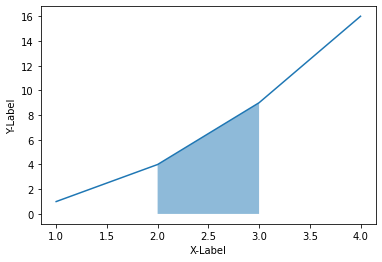

In [17]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 4, 9, 16]

plt.plot(x, y)
plt.xlabel('X-Label')
plt.ylabel('Y-Label')

## fill_between() 사용
# 네 점 (x[1], y[1]), (x[2], y[2]), (x[1], 0), (x[2], 0)을 잇는 영역이 채워짐
plt.fill_between(x[1:3],y[1:3],alpha=0.5)
plt.show()

### 확률의 성질 


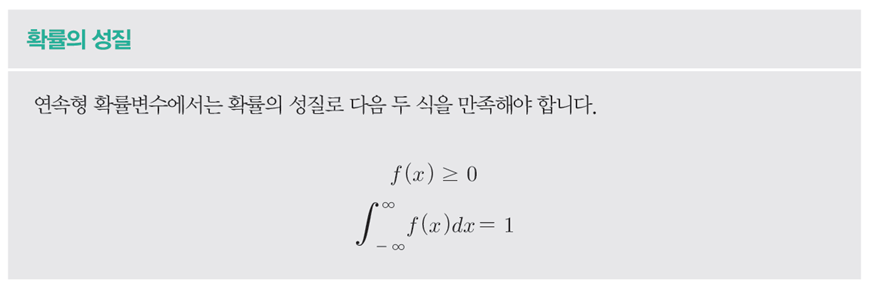

- 첫번째 성질 : 함수 f(x)의 반환값 0보다 같거나 커야한다
    - 위 성질을 확인하기 위해 minimize_scalar 함수 사용
    - minimize_scalar(함수) : 함수를 실행한 결과값이 최소가되는 x값과 최소결과 y를 반환

In [20]:
# minimize_scalar 사용예제
from scipy.optimize import minimize_scalar

def func(x):
    return (x-1.5)**2+0.5
res=minimize_scalar(func)

# func에 최소값이 되게하는 해 x와 x를 대입했을 때 최소값 y
opt_x,opt_y=res.x,res.fun

print('x: {}, y: {}'.format(opt_x, opt_y))

## 위 func 함수에 x값 1.5를 전달하면 결과값 y 0.5로 최솟값이 나옴
## 반환되는 최소값은  .fun 속성에, 최소반환값을 만들어내는 x값은 .res 속성에 저장되어 있음

x: 1.5, y: 0.5


In [72]:
# 위에서 생성해 놓은 불공정 룰렛의 확률함수
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0

In [23]:
# 위 함수가 반환하는 최소값 확인 : 
# 0을 반환하므로 첫번째 연속형 확률변수의 확률의 성질을 만족 함

from scipy.optimize import minimize_scalar

# 함수를 사용해서  최솟값은 fun이라는 인스턴스 변수에 저장되어 있음
res=minimize_scalar(f)
# 함수 f(x) 의 결과값으나 나타나는 최솟값은 0이고 0을 만들어내는 x값은 -1.61803...
res.x
res.fun

-1.618

0

- 위 연산의 확인으로 인해 f(x) >= 0의 연속형 확률변수의 첫번째 확률의 성질이 만족 됨

#### 연속형 확률변수의 두번 째 확률의 성질
![](확률성질2.png)



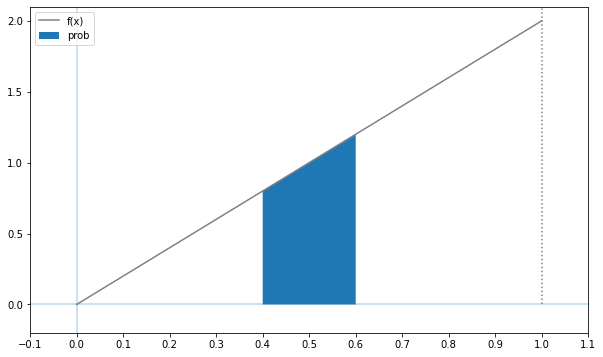

- 두번째 f(x)를 －∞ 부터 ∞ 까지 적분한 결과가 1이라는 것은 위 그림에서 삼각형의 면적이 1이 되는 것과 같다
    - 이 삼각형은 밑변의 길이가 1, 높이가 2 이므로 면적이 1이라는 것을 간단히 알 수 있음

### quad() : 수치적분 함수

- **수치적분(numerical integration)**은 함수를 아주 작은 구간으로 나누어 실제 면적을 계산함으로써 정적분의 값을 구하는 방법이다. 
- Scipy의 integrate 서브패키지의 quad 명령으로 수치적분을 할 수 있다.

- 첫 번째 인수는 피적분함수、두 번째 인수와 세 번째 인수는 적분 범위
- 첫번째 반환값이 수치 적분으로 얻어진 결과이며, 두번째의 값은 추정 오차

In [24]:
## 두번째 성질을 적분 계산으로 확인
integrate.quad(f,-np.inf,np.inf)
#  f(x)를 -무한대부터 +무한대까지 적분한 결과가 1 이어야 함 / 0은 수정오차 없음)
# - 두번째 확률이 성질을 만족

(1.000, 0.000)

- 위 사다리꼴 영역을 적분으로 구하는 식

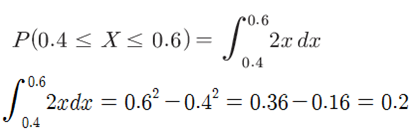

In [14]:
f

<function __main__.f(x)>

In [25]:
# 확률변수 X에 대하여 0.4~0.6이 나올 확률은 0.2
integrate.quad(f,0.4,0.6)

# 첫번째 반환 값 적분값 - 첫번째 반확값이 0.2 이므로 확률이 0.2

(0.200, 0.000)

### 불공정한 룰렛의 확률함수 식
   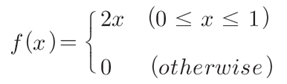

In [26]:
x_range

array([0, 1])

In [27]:
# 함수 정의시 2를 곱하는 이유는 확률의 성질을 만족하기 위해서 임
# 만약 함수를 아래와 같이 정의하면
def f_1(x):
    if x_range[0] <= x <= x_range[1]:
        return  x
    else:
        return 0

In [28]:
# 함수 f_1을 포함하는 확률변수가 확률의 성질을 
# 확률성질 1
res=minimize_scalar(f_1)
# 함수를 사용해서  최솟값은 fun이라는 인스턴스 변수에 저장되어 있음
res.x
res.fun
# 함수 f(x) 의 결과값으로 나타나는 최솟값은 0이고 0을 만들어내는 x값은 -1.61803...



-1.618

0

In [29]:
# 확률성질2
integrate.quad(f_1,-np.inf,np.inf)
## 적분하면 1이 나오지 않음 - 연속확률변수로 볼 수 없음

(0.500, 0.000)

##### 그래서 x에 2를 곱하는걸로 함수를 가정 함

### 누적 분포 함수

- 𝑋가 𝑥 이하가 될 때의 확률을 반환하는 함수

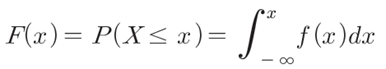

In [31]:
# 위 누적 분포 분포함수 구현
def F(x):
    return integrate.quad(f,-np.inf,x)[0]

- 룰렛 0.4에서 0.6 사이의 값을 취할 확률

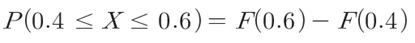

In [32]:
F(0.6)-F(0.4)

0.200

- 위 분포 함수 F(x)를 그래프로 그려보면 반드시 단조 증가함수(x가 증가할 때 y는 감소하지 않는 함수)가 됨

(-0.100, 1.100)

(-0.100, 1.100)

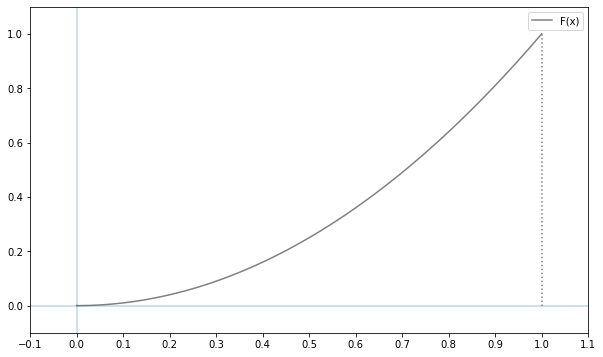

In [35]:
# 단조 증가 함수확인

xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

### 1차원 연속형 확률분포의 지표

#### 평균 - 기댓값
- 확률밀도함수 f(x)를 가중치로 하여 모든 가능한 표본 x를 적분한 값
- 적분 면적으로 계산
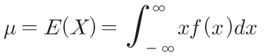

In [73]:
# 위에서 생성해 놓은 불공정 룰렛의 확률함수
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0
    
# (xf(x)) 계산 코드 - 가중치 적용
def integrand(x):
    return x*f(x)


In [74]:
# 불공정 룰렛의 기대값
integrate.quad(integrand,-np.inf,np.inf)
#기대값 계산(확률은 적분면적으로 계산)

(0.667, 0.000)

In [84]:
#기대값 함수
def E(X,g=lambda x:x): #기대값 함수
    x_range,f=X
    def integrand(x):
        return g(x)*f(x)
    return integrate.quad(integrand,-np.inf,np.inf)[0]

In [85]:
E(X)

0.667

In [86]:
#확률변수변환시 기대값
E(X,lambda x:2*x+3)

4.333

In [78]:
2*E(X)+3

4.333

#### 분산

-  μ 는 확률변수 X의 기대값

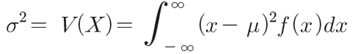


In [79]:
# 분산계산
mean=E(X)

def inter_v(x):
    return (x-mean)**2*f(x)

integrate.quad(inter_v,-np.inf,np.inf)[0]

0.056

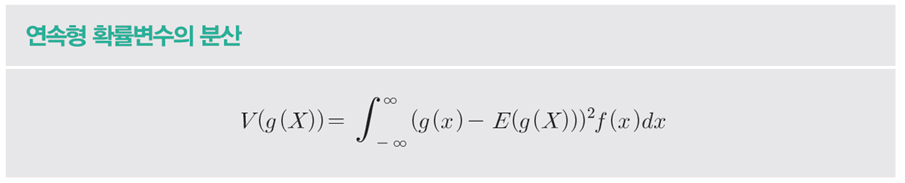

- 연속확률변수의 분산은 평균으로부터 표본 데이터까지 거리의 제곱을 확률밀도함수 f(x)로 가중하여 적분한 값
- 위 수식을 함수로 구현

In [87]:
def V(X,g=lambda x:x):
    x_range,f=X
    mean=E(X,g)
    def integrand(x):
        return (g(x)-mean)**2 * f(x)
    return integrate.quad(integrand,-np.inf,np.inf)[0]

In [88]:
V(X)

0.056

In [89]:
# 확률변환변수의 분산
V(X,lambda x:2*x+3)

0.222

In [90]:
# 이산형 확률변수에서 확인했던 분산의 성질에 따라 아래 수식으로도 계산 가능
2**2*V(X)

0.222